In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm, randint, uniform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler, 
    OrdinalEncoder
)
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    precision_recall_curve, 
    accuracy_score, 
    precision_score, 
    r2_score, 
    recall_score, 
    roc_auc_score,
    f1_score
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance

# 1 Загрузка данных

In [2]:
df_market_file = pd.read_csv('/Users/pasternak/Dev/datasets/market_file.csv')

In [3]:
df_market_money = pd.read_csv('/Users/pasternak/Dev/datasets/market_money.csv')

In [4]:
df_market_time = pd.read_csv('/Users/pasternak/Dev/datasets/market_time.csv')

In [5]:
df_money = pd.read_csv('/Users/pasternak/Dev/datasets/money.csv',delimiter=';')

In [6]:
print('Таблица df_market_file:')
display(df_market_file.head())
df_market_file.info()
print('-'*70)
print('Таблица df_market_money:')
display(df_market_money.head())
df_market_money.info()
print('-'*70)
print('Таблица df_market_time:')
display(df_market_time.head())
df_market_time.info()
print('-'*70)
print('Таблица df_money:')
display(df_money.head())
df_money.info()

Таблица df_market_file:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
----------------------------------------------------------------------
Таблица df_market_time:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
----------------------------------------------------------------------
Таблица df_money:


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


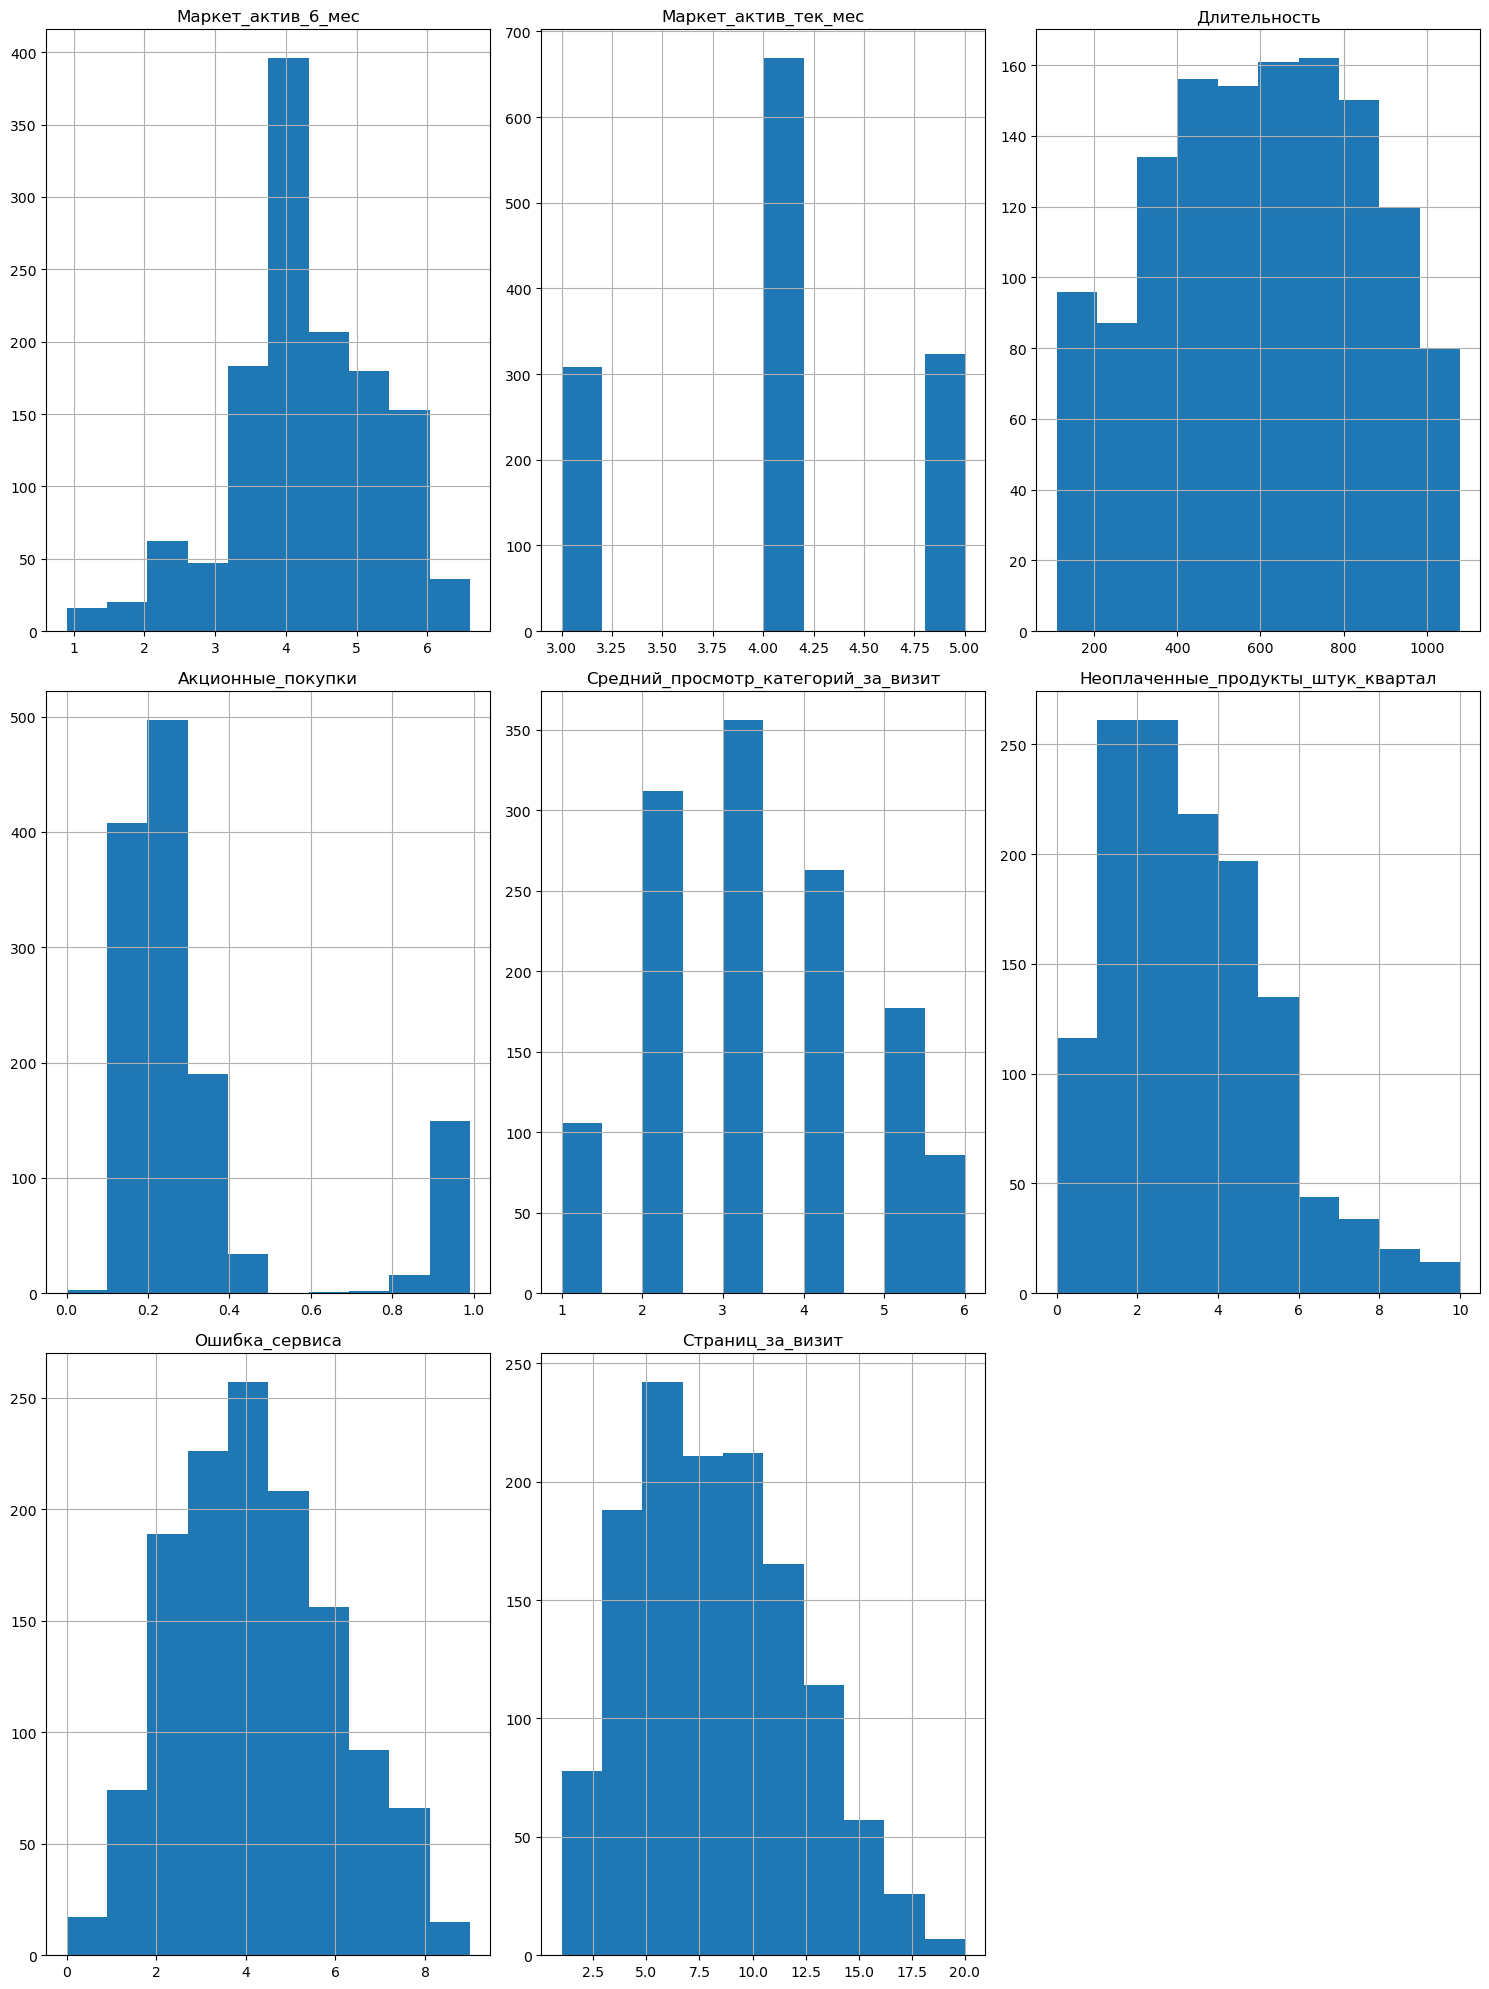

In [7]:
df_market_hist = df_market_file.drop('id', axis=1)
df_market_hist.hist(figsize=(15, 20))
plt.tight_layout()
plt.show() 

Данные во всех таблицах полные, консистентные. Пропуски отсутствуют, тип данных корректный за исключением колонки Прибыль в таблице df_money. Названия столбцов в таблицах по условию задачи не меняю. 

Данные можно использовать для дальнейшего исследования.

#  2 Предобработка данных

In [8]:
df_money['Прибыль'] = df_money['Прибыль'].str.replace(',', '.').astype(float)

In [9]:
def remove_duplicates(df):
    """
    Функция удаляет явные и скрытые дубликаты из DataFrame.
    """
    cleaned_df = df.drop_duplicates()
    for col in cleaned_df.select_dtypes(include=['object']).columns:
        cleaned_df[col] = cleaned_df[col].apply(lambda x: str(x).strip().lower())
    final_cleaned_df = cleaned_df.drop_duplicates()

    return final_cleaned_df

In [10]:
df_market_file = remove_duplicates(df_market_file)
df_market_money = remove_duplicates(df_market_money)
df_market_time = remove_duplicates(df_market_time)
df_money = remove_duplicates(df_money)

In [11]:
def find_unique_object_values(dataframe):
    """
    Возвращает словарь с уникальными значениями для каждого столбца типа 'object'.
    """
    result = {}
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            result[column] = set(dataframe[column])
            
    return result

In [12]:
print('Таблица df_market_file:', find_unique_object_values(df_market_file))
print('Таблица df_market_money:', find_unique_object_values(df_market_money))
print('Таблица df_market_time:', find_unique_object_values(df_market_time))
print('Таблица df_money:', find_unique_object_values(df_money))

Таблица df_market_file: {'Покупательская активность': {'снизилась', 'прежний уровень'}, 'Тип сервиса': {'премиум', 'стандарт', 'стандартт'}, 'Разрешить сообщать': {'да', 'нет'}, 'Популярная_категория': {'товары для детей', 'косметика и аксесуары', 'кухонная посуда', 'техника для красоты и здоровья', 'домашний текстиль', 'мелкая бытовая техника и электроника'}}
Таблица df_market_money: {'Период': {'текущий_месяц', 'предыдущий_месяц', 'препредыдущий_месяц'}}
Таблица df_market_time: {'Период': {'предыдцщий_месяц', 'текущий_месяц'}}
Таблица df_money: {}


In [13]:
df_market_file['Тип сервиса'] = (df_market_file['Тип сервиса'].replace('стандартт', 'стандарт', regex=True))
df_market_file['Популярная_категория'] = (df_market_file['Популярная_категория'].replace('косметика и аксесуары', 'косметика и аксессуары', regex=True))
df_market_time['Период'] = (df_market_money['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц', regex=True))

В рамках предобработки данных в таблицах были удалены явные и неявные дубликаты. Пропусков в данных нет.

# 3 Исследовательский анализ данных

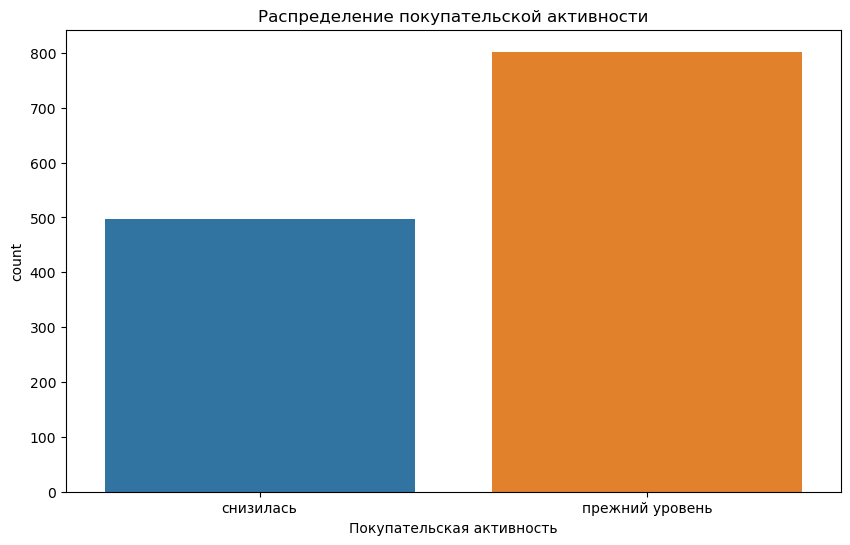

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Покупательская активность', data=df_market_file)
plt.title('Распределение покупательской активности')
plt.show()

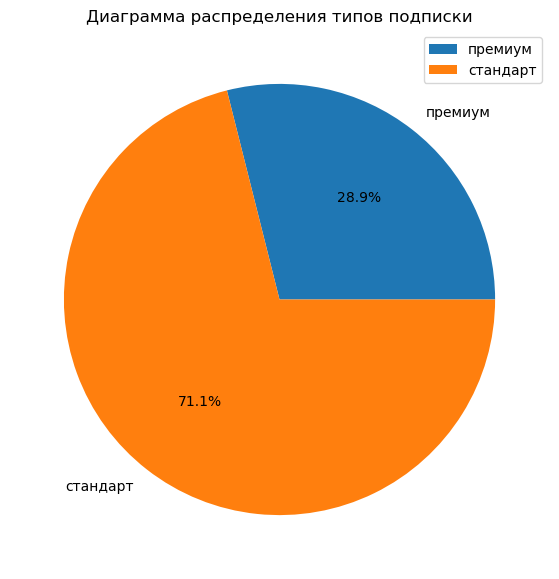

In [15]:
df_market_file.pivot_table(index='Тип сервиса', 
                           values='id', 
                           aggfunc='count').plot.pie(y='id', 
                                                    figsize=(10,7), 
                                                    label='', 
                                                    title='Диаграмма распределения типов подписки',
                                                    autopct='%1.1f%%')

plt.show()

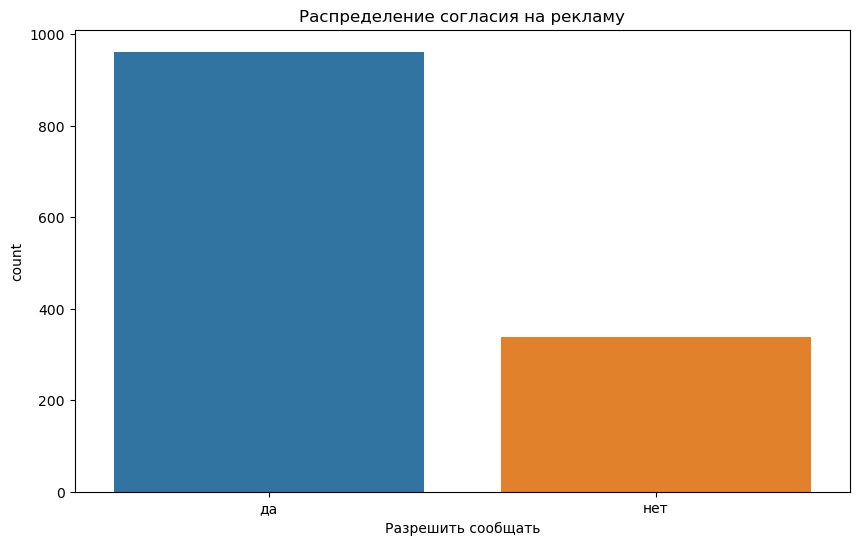

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Разрешить сообщать', data=df_market_file)
plt.title('Распределение согласия на рекламу')
plt.show()

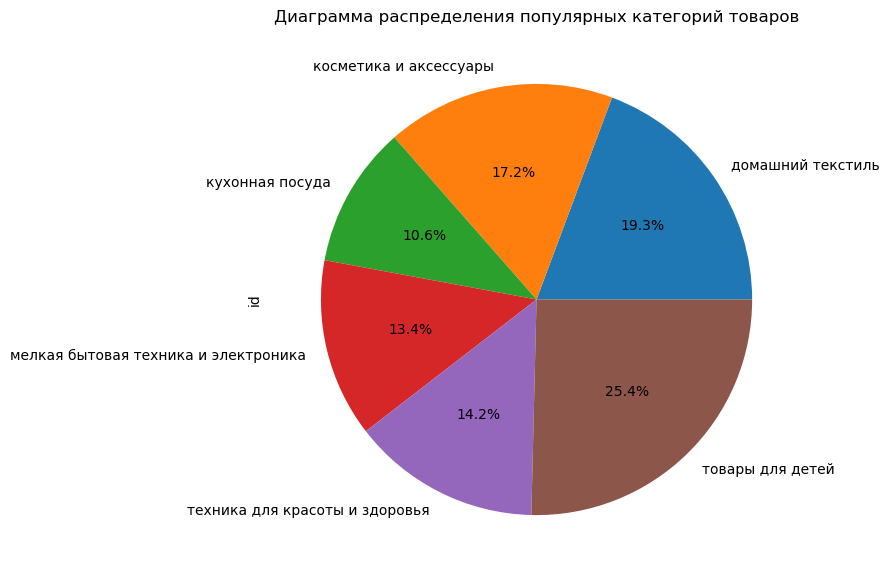

In [17]:
df_market_file.pivot_table(index='Популярная_категория', values='id', aggfunc='count').plot.pie(y='id', figsize=(10,7), legend=False, autopct='%1.1f%%', title='Диаграмма распределения популярных категорий товаров')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


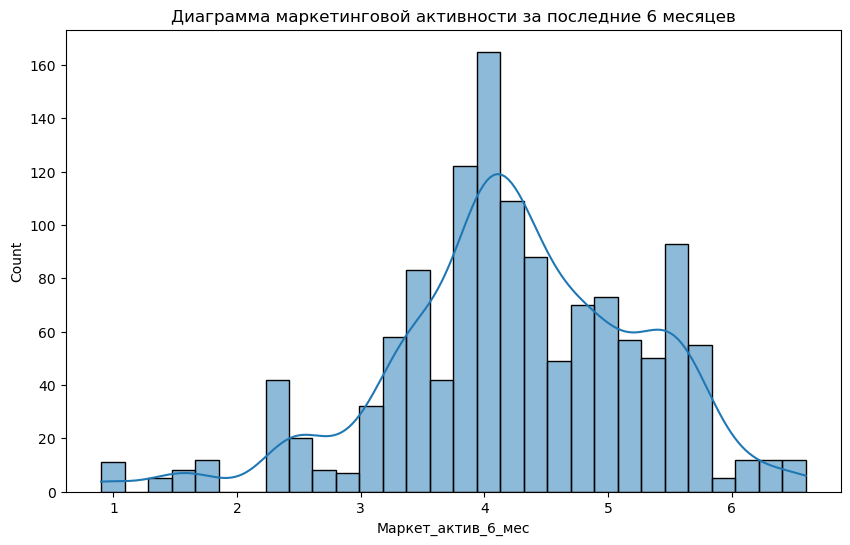

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_market_file, x='Маркет_актив_6_мес', bins=30, kde=True)
plt.title('Диаграмма маркетинговой активности за последние 6 месяцев')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


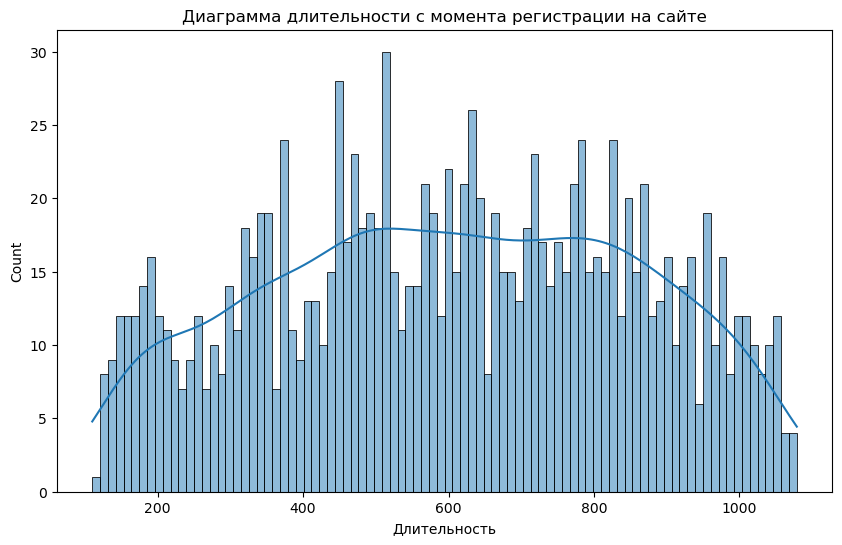

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_market_file, x='Длительность', bins=90, kde=True)
plt.title('Диаграмма длительности с момента регистрации на сайте')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


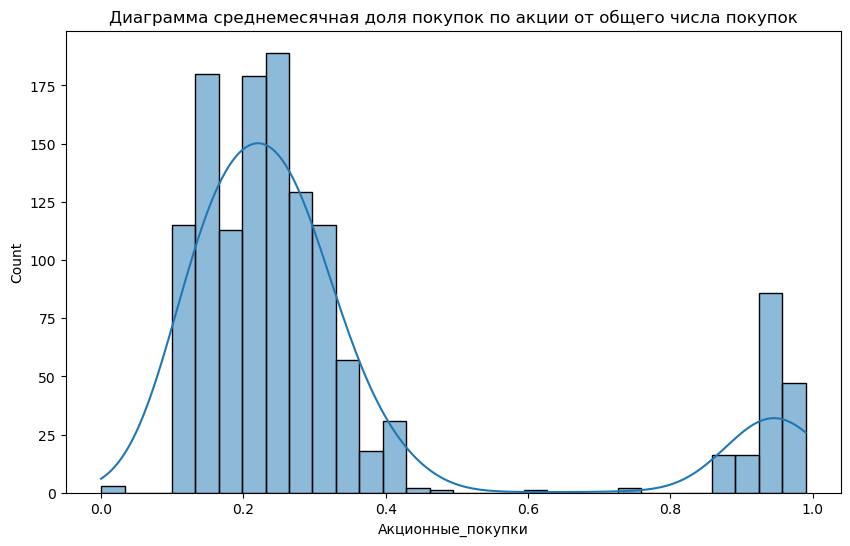

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_market_file, x='Акционные_покупки', bins=30, kde=True)
plt.title('Диаграмма среднемесячная доля покупок по акции от общего числа покупок')
plt.show()

In [21]:
def discrete_plot(df, columns_list):
    """
    Функция строит гистограмму/счётчик для заданного дискретного признака в dataframe.
    
    :param df: Исходный dataset (DataFrame).
    :param column_name: Название столбца с дискретными значениями.
    """
   
    for col in columns_list:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, color="#4C72B0", edgecolor="black", linewidth=1.5)
        plt.title(f'Распределение по "{col}"', fontsize=18)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Количество записей', fontsize=14)
        plt.show()

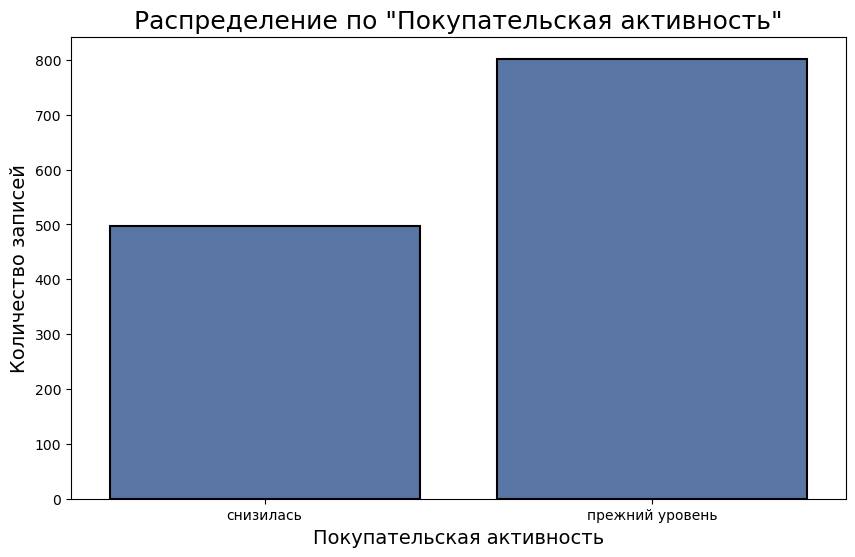

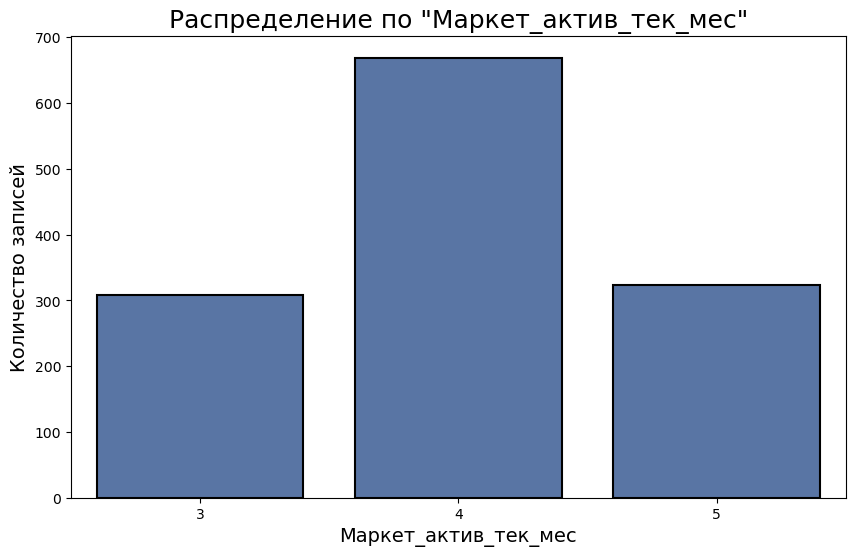

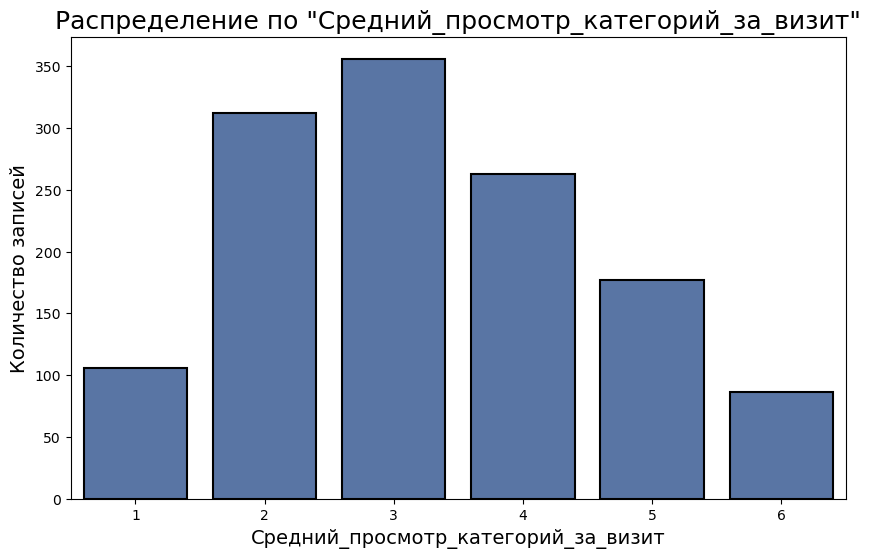

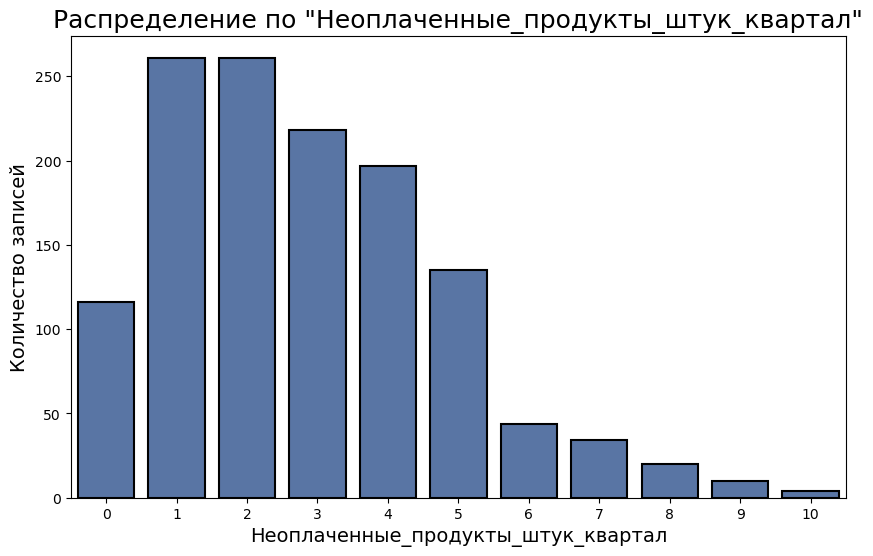

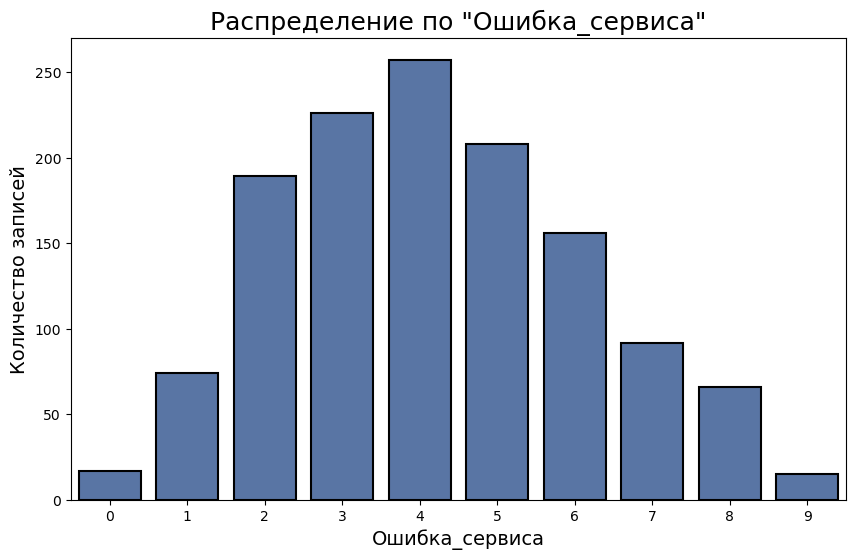

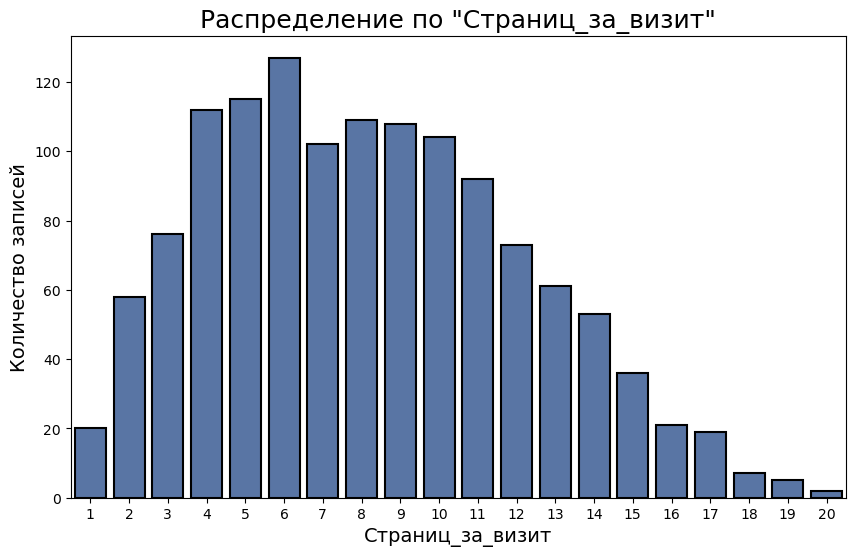

In [22]:
discrete_column = ['Покупательская активность',
                   'Маркет_актив_тек_мес', 
                   'Средний_просмотр_категорий_за_визит', 
                   'Неоплаченные_продукты_штук_квартал',
                   'Ошибка_сервиса',
                   'Страниц_за_визит',]
discrete_plot(df_market_file, discrete_column)

In [23]:
def describe_numeric_columns(df):
    
    """Показывает статистику по всем числовым данным датасета"""
    
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    if len(numeric_cols) > 0:
        return display(df[numeric_cols].describe())
    else:
        print("Нет числовых столбцов.")

In [24]:
df_market_file['id'] = df_market_file['id'].astype(object)
df_market_money['id'] = df_market_money['id'].astype(object)

In [25]:
print(describe_numeric_columns(df_market_file))

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


None


Выводы:

В данных df_market_file отсутствуют выбросы, за исключением признака "Акционные_покупки". Исключать этот выброс не стоит, т.к. предполагается, что акции были настолько выгодны в моменте, что покупатели сосредоточились только на них. 

---
▌ 1. Маркет\_актив\_6\_мес

Показатель характеризуется средним разбросом значений вокруг среднего, с небольшой долей экстремальных значений (6.6).

---
▌ 2. Маркет\_актив\_тек\_мес

Практически однородные значения сосредоточены вблизи среднего, стандартное отклонение низкое, вариация небольшая.

---
▌ 3. Длительность

Значительные колебания значений, широкий диапазон показывает сильную дисперсию длительности активности пользователей.

---
▌ 4. Акционные\_покупки

Низкий средний уровень участия в акциях, сильное расхождение среди отдельных клиентов (есть нулевые значения и высокие до 0.99).

---
▌ 5. Средний\_просмотр\_категорий\_за\_визит

Небольшое количество просматриваемых категорий за визит, среднее около 3-х категорий.

---
▌ 6. Неоплаченные\_продукты\_штук\_квартал

Много брошенных товаров в корзине (среднее 2.8 продукта); сильные различия в поведении клиентов, некоторые оставляют до 10 товаров.

---
▌ 7. Ошибка\_сервиса

Среднечастые сбои сервиса, сильно варьируются от клиента к клиенту.

---
▌ 8. Страниц\_за\_визит

Средняя глубина просмотров составляет примерно 8 страниц, большой разброс значений демонстрирует разнообразие поведения пользователей.



В данных df_market_money обнаружен единичный выброс, который позже будет удален при необходимости.


В обшем данные распределены нормально, зачастую со смещением влево.

Категориальные данные:

Доля стабильной покупательской активности на 30% больше чем доля покупателей со сниженной покупательской активностью
1/3 покупателей пользуется подпиской "премиум"
50% покупателей дали получают рекламные материалы с из согласия
Среди популярных категорий товаров чаще покупают товары для детей (25%), на втором месте Домашний тестиль(19%). Остальные покупки в пределах популярных категорий распределены в диапазоне 14-17% каждый.

В целом покупательсткая активность снижается.


In [26]:
buyers_with_purchases = df_market_money[df_market_money['Выручка'] > 0].groupby('Период')['id'].nunique()
print(buyers_with_purchases)

Период
предыдущий_месяц       1297
препредыдущий_месяц    1297
текущий_месяц          1300
Name: id, dtype: int64


In [27]:
periods_with_revenue = df_market_money.groupby('id')['Выручка'].apply(lambda x: (x > 0).sum())
active_ids = periods_with_revenue[periods_with_revenue == 3].index
all_ids = df_market_money['id'].unique()
inactive_ids = set(all_ids) - set(active_ids)
print(sorted(inactive_ids))

# строки исходного DF с этими id
df_inactive = df_market_money[df_market_money['id'].isin(inactive_ids)]
df_inactive[['id', 'Период', 'Выручка']].drop_duplicates().sort_values('id')

[215348, 215357, 215359]


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
27,215357,текущий_месяц,5986.3
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
33,215359,текущий_месяц,4735.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [28]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   object 
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), object(2)
memory usage: 91.5+ KB


max_revenue_idx = df_market_money['Выручка'].idxmax()
df_market_money = df_market_money.drop(max_revenue_idx)

In [29]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   object 
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), object(2)
memory usage: 91.5+ KB


# 4 Объединение таблиц

In [30]:
money_pivoted = df_market_money.pivot_table(
    index="id",
    columns="Период",
    values="Выручка",
    aggfunc="first"
).reset_index()

time_pivoted = df_market_time.pivot_table(
    index="id",
    columns="Период",
    values="минут",
    aggfunc="first"
).reset_index()

money_pivoted.columns = ["id"] + list(money_pivoted.columns)[1:]
time_pivoted.columns = ["id"] + list(time_pivoted.columns)[1:]

df_market_file_full = df_market_file.merge(money_pivoted, on="id", how="left")
df_market_file_full = df_market_file_full.merge(time_pivoted, on="id", how="left")

display(df_market_file_full)
df_market_file_full.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц_x,текущий_месяц_x,предыдущий_месяц_y,препредыдущий_месяц_y,текущий_месяц_y
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары для детей,6,2,1,5,0.0,0.0,3293.1,NaN,14.0,13.0
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары для детей,4,4,2,5,5216.0,4472.0,4971.6,10.0,12.0,NaN
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8.0,NaN,13.0
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары для детей,5,0,6,4,6158.0,4793.0,6610.4,NaN,13.0,11.0
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары для детей,3,2,3,2,5807.5,4594.0,5872.5,11.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,прежний уровень,стандарт,да,6.6,3,318,0.24,техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14.0,NaN,7.0
1296,216644,прежний уровень,стандарт,нет,5.1,4,454,0.21,домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,11.0,12.0,NaN
1297,216645,прежний уровень,стандарт,да,4.1,3,586,0.20,домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,NaN,NaN,12.0
1298,216646,прежний уровень,стандарт,да,6.3,5,645,0.12,техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,7.0,18.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   object 
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [31]:
df_market_file_full.rename(columns={'предыдущий_месяц_y': 'Минуты_на сайте_пред.мес'}, inplace=True)
df_market_file_full.rename(columns={'текущий_месяц_y': 'Минуты_на сайте_тек.мес'}, inplace=True)
df_market_file_full.rename(columns={'препредыдущий_месяц_y': 'Минуты_на сайте_предпред.мес'}, inplace=True)
df_market_file_full.rename(columns={'текущий_месяц_x': 'Выручка_тек.мес'}, inplace=True)
df_market_file_full.rename(columns={'предыдущий_месяц_x': 'Выручка_пред.мес'}, inplace=True)
df_market_file_full.rename(columns={'препредыдущий_месяц_x': 'Выручка_предпред.мес'}, inplace=True)

df_market_file_full.fillna(0, inplace=True)
df_market_file_full['Минуты_на сайте_тек.мес'] = df_market_file_full['Минуты_на сайте_тек.мес'].astype(int)
df_market_file_full['Минуты_на сайте_пред.мес'] = df_market_file_full['Минуты_на сайте_пред.мес'].astype(int)
df_market_file_full['Минуты_на сайте_предпред.мес'] = df_market_file_full['Минуты_на сайте_пред.мес'].astype(int)
df_market_file_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   object 
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [32]:
def find_max_row(df, cols):
    return df.loc[(df[cols].stack().groupby(level=0).max()).argmax()]

max_row = find_max_row(df_market_file_full, ['Выручка_тек.мес', 'Выручка_пред.мес', 'Выручка_предпред.мес'])
max_row_idx = max_row.name
df_market_file_full = df_market_file_full.drop(index=max_row_idx)

In [33]:
df_market_file_full = df_market_file_full[df_market_file_full['id'].isin(active_ids)]

In [34]:
df_market_file_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 1 to 1299
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   object 
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                     

# 5 Корреляционный анализ

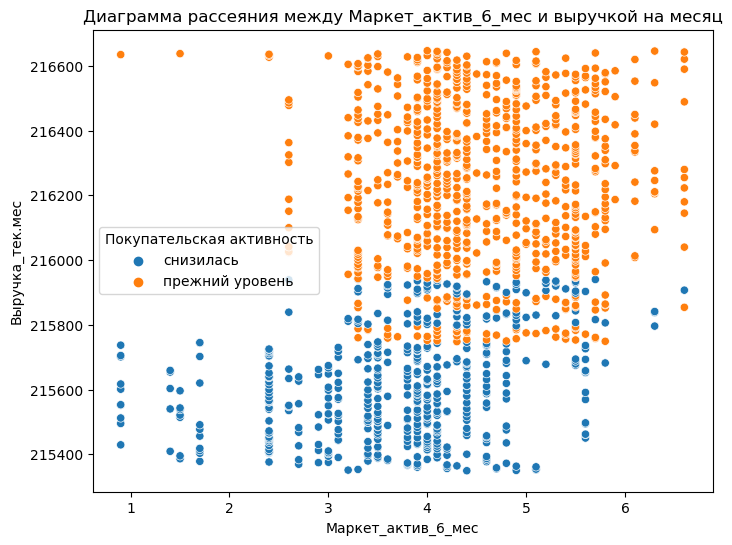

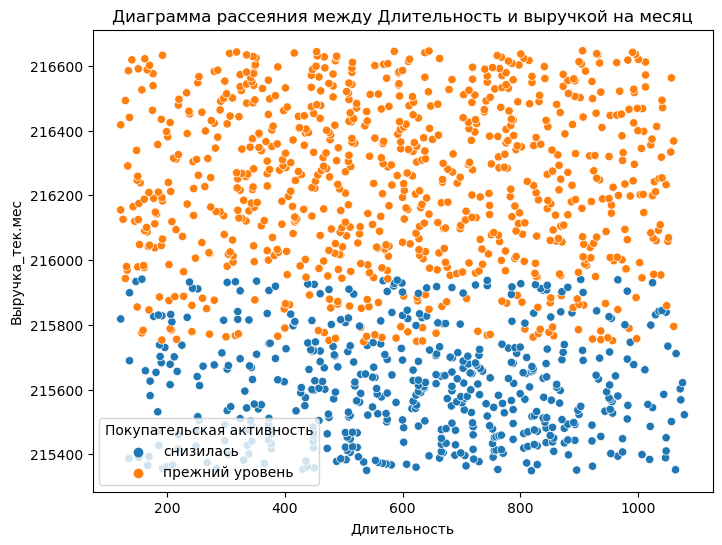

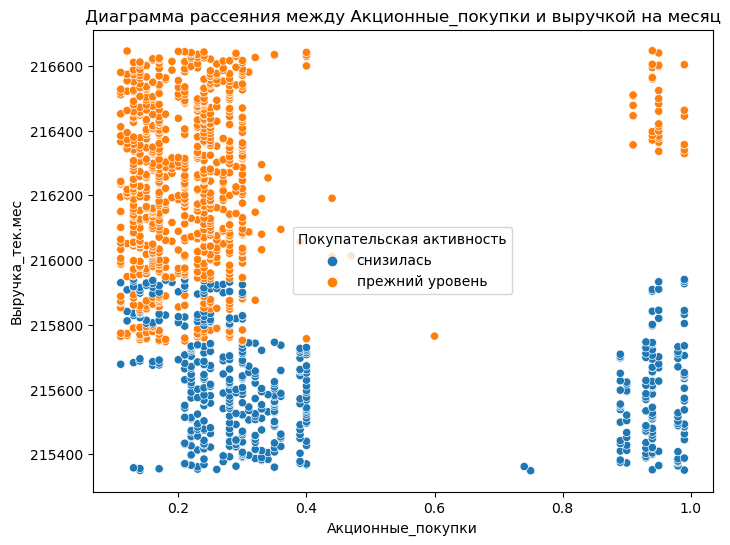

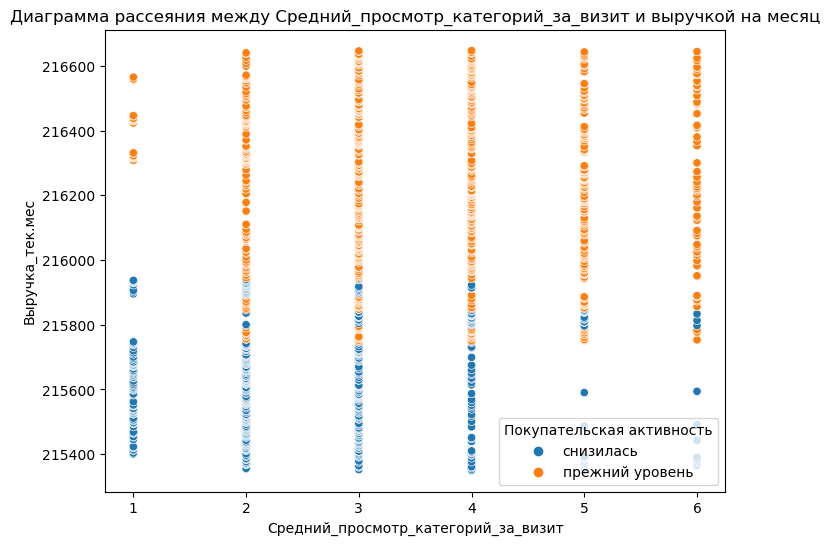

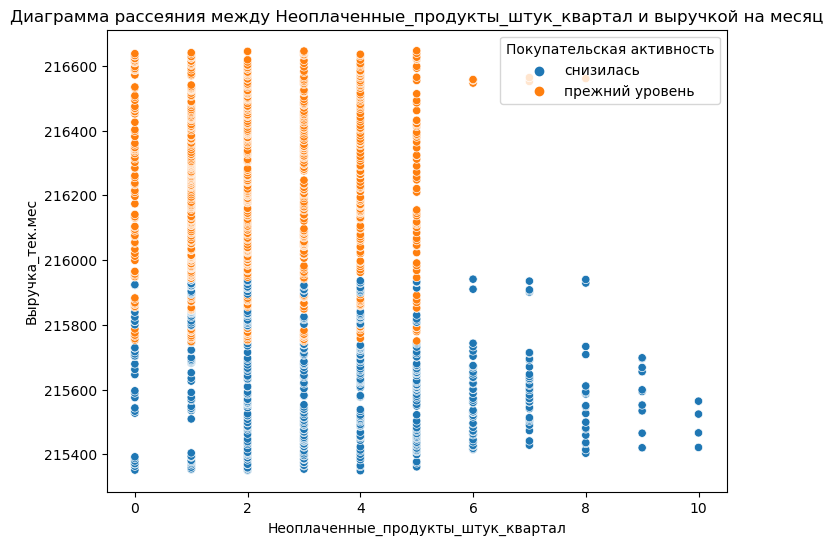

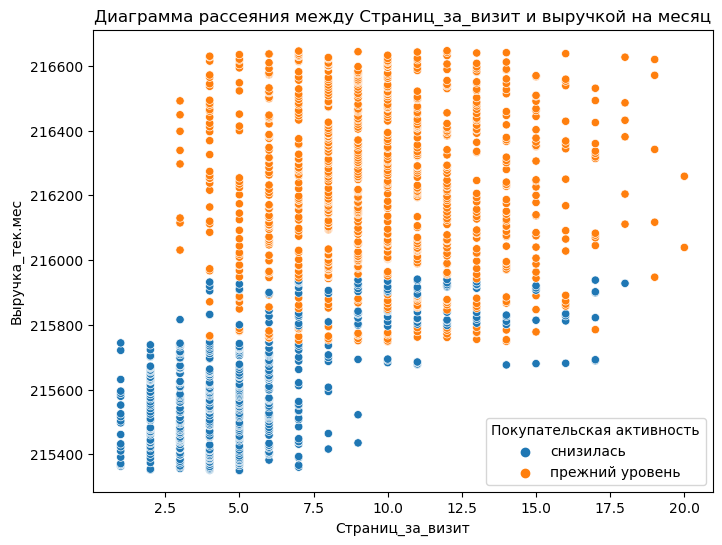

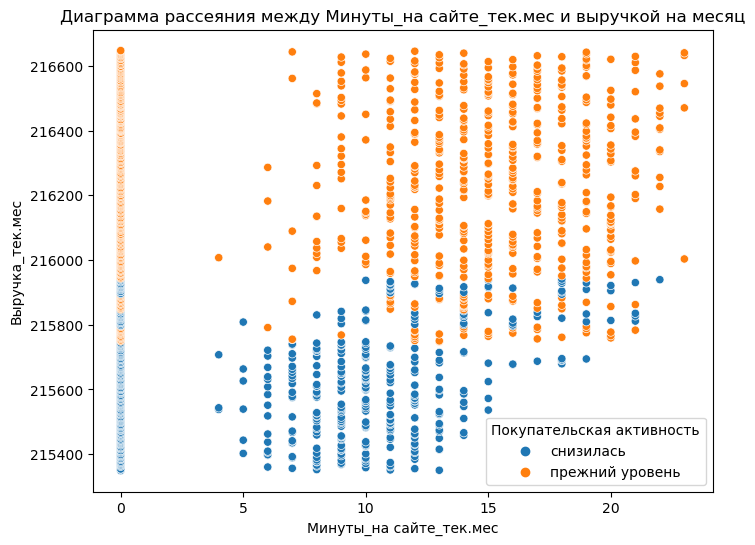

In [35]:
quantitative_features = ['Маркет_актив_6_мес', 
                         'Длительность', 
                         'Акционные_покупки',
                         'Средний_просмотр_категорий_за_визит', 
                         'Неоплаченные_продукты_штук_квартал', 
                         'Страниц_за_визит', 
                         'Минуты_на сайте_тек.мес'
]

for feature in quantitative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='id', hue='Покупательская активность', data=df_market_file_full)
    
    plt.title(f'Диаграмма рассеяния между {feature} и выручкой на месяц')
    plt.xlabel(feature)
    plt.ylabel('Выручка_тек.мес')
    
    plt.legend(title='Покупательская активность')
    
    plt.show()

# 6 Построение моделей с использованием пайплайнов

ОБОСНОВАНИЕ ВЫБОРА МЕТРИКИ ROC-AUC

1) Дисбаланс классов  
В наших данных распределение целевой переменной неравномерно: один класс встречается значительно чаще другого. В таких условиях простые метрики, зависящие от выбранного порога (точность, полнота при одном фиксированном пороге), могут давать вводящую в заблуждение картину качества модели.

2) Независимость от порога классификации  
ROC-AUC оценивает способность модели ранжировать объекты по вероятности принадлежности к положительному классу и вычисляется по всей кривой зависимостей true positive rate (TPR) и false positive rate (FPR) при разных порогах. Это позволяет судить о качестве разделения классов без привязки к конкретному порогу принятия решения.

3) Устойчивость к дисбалансу классов  
ROC-AUC менее чувствительна к дисбалансу классов по сравнению с метриками, зависящими от абсолютных долей предсказаний (например, accuracy). Поскольку ROC-AUC основана на отношениях TPR и FPR, она корректно отражает ранжирующую способность модели даже при несбалансированных классах.

4) Оценка на различных порогах принятия решений  
ROC-AUC показывает, как меняется компромисс между чувствительностью и специфичностью при смене порога. Это важно, когда бизнес-требования могут задавать разные приоритеты (минимизировать ложные срабатывания или пропуски), и позволяет выбрать оптимальный порог на основе анализа кривой.

In [36]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

# загружаем данные
df_full = df_market_file_full.copy()

X = df_full.drop(['id',
                  'Покупательская активность',
                  'Минуты_на сайте_пред.мес',
                  'Маркет_актив_тек_мес',
                  'Выручка_пред.мес',
                  'Выручка_предпред.мес',
                  'Минуты_на сайте_предпред.мес'], axis=1)
y = df_full['Покупательская активность']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(X_train.shape, X_test.shape)

ohe_columns = ['Разрешить сообщать', 'Популярная_категория']

num_columns = [
    'Маркет_актив_6_мес', 'Длительность', 'Акционные_покупки',
    'Средний_просмотр_категорий_за_визит',
    'Минуты_на сайте_тек.мес', 'Ошибка_сервиса',
]

num_rob_columns = ['Неоплаченные_продукты_штук_квартал', 'Выручка_тек.мес']


ordinal_columns = ['Тип сервиса']
ordinal_categories = {'Тип сервиса': ['стандарт', 'премиум']}

data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler()),
            ('minmax', MinMaxScaler())
        ]), num_columns),

        ('num_robust', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('robust', RobustScaler()),
            ('minmax', MinMaxScaler())
        ]), num_rob_columns),

        ('cat_ordinal', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(
                categories=[ordinal_categories[col] for col in ordinal_columns],
                handle_unknown='use_encoded_value',
                unknown_value=-1
            ))
        ]), ordinal_columns),

        ('cat_ohe', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='error', sparse=False, drop='first'))
]), ohe_columns)
    ],
    remainder='drop'
)


# Пайплайн
pipe_final = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# Сетки параметров
param_distributions = [
    {
     "classifier": [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     "classifier__max_depth": randint(1, 6),
     "classifier__max_features": randint(1, max(1, len(num_columns) + len(num_rob_columns) + len(ohe_columns))),
     "classifier__min_samples_leaf": randint(1, 6)
    },
    {
     "classifier": [LogisticRegression(penalty='l1', solver='liblinear', random_state=RANDOM_STATE, max_iter=1000)],
     "classifier__C": [0.01, 0.1, 1, 10, 100]
    },
    {
     "classifier": [SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)],
     "classifier__C": [0.01, 0.1, 1, 10, 100]
    }
]

randomized_search = RandomizedSearchCV(
    estimator=pipe_final,
    param_distributions=param_distributions,
    cv=4,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_iter=20,
    n_jobs=-1,
    verbose=1
)

randomized_search.fit(X_train, y_train)
best_model = randomized_search.best_estimator_

print('Лучшая модель и её параметры\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на кросс-валидации', randomized_search.best_score_)


(972, 12) (324, 12)
Fitting 4 folds for each of 20 candidates, totalling 80 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

Лучшая модель и её параметры
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Маркет_актив_6_мес',
                                                   'Длительность',
                                                   'Акционные_покупки',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Минуты_на сайте_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

In [37]:
# ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
test_accuracy = accuracy_score(y_test, y_pred)
print("ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ")
print(f"ROC-AUC на тесте: {test_roc_auc:.4f}")
print(f"Accuracy на тесте: {test_accuracy:.4f}")
# BASELINE МОДЕЛЬ
dummy_clf = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)
dummy_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]
dummy_roc_auc = roc_auc_score(y_test, dummy_pred_proba)
print(f"\nROC-AUC Baseline (Dummy): {dummy_roc_auc:.4f}")

ОЦЕНКА НА ТЕСТОВОЙ ВЫБОРКЕ
ROC-AUC на тесте: 0.8550
Accuracy на тесте: 0.7994

ROC-AUC Baseline (Dummy): 0.4945


# 7 Анализ важности признаков

Количество feature_names: 12
Размер perm_importance: 12


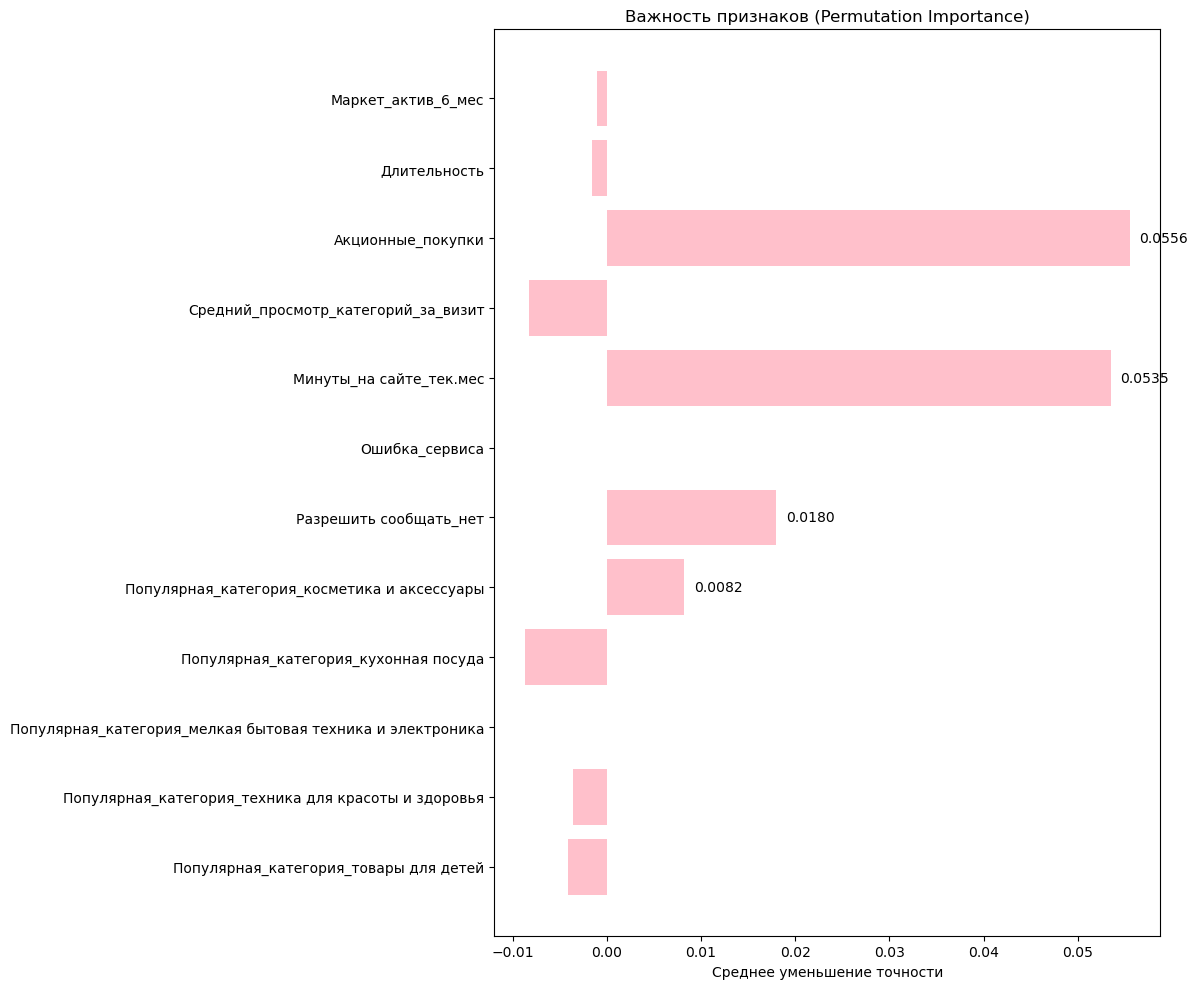

Важные признаки:
1. Акционные_покупки: 0.0556
2. Минуты_на сайте_тек.мес: 0.0535
3. Разрешить сообщать_нет: 0.0180
4. Популярная_категория_косметика и аксессуары: 0.0082


In [38]:
preprocessor = best_model.named_steps['preprocessor']

num_features = num_columns.copy()

cat_encoder = preprocessor.named_transformers_['cat_ohe']['encoder']
cat_features = list(cat_encoder.get_feature_names_out(input_features=ohe_columns))

feature_names = num_features + cat_features

perm_importance = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=6,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

print(f"Количество feature_names: {len(feature_names)}")
print(f"Размер perm_importance: {len(perm_importance.importances_mean)}")
# Если размерности не совпадают, используем только доступные признаки
if len(perm_importance.importances_mean) != len(feature_names):
    n = min(len(perm_importance.importances_mean), len(feature_names))
    importance_values = perm_importance.importances_mean[:n]
    feature_names_plot = feature_names[:n]
else:
    importance_values = perm_importance.importances_mean
    feature_names_plot = feature_names


sorted_idx = importance_values.argsort()[::-1]
plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(feature_names_plot)), 
                importance_values,
                color = 'pink')
plt.yticks(range(len(feature_names_plot)), 
           [feature_names_plot[i] for i in range(len(feature_names_plot))])
plt.title('Важность признаков (Permutation Importance)')
plt.xlabel('Среднее уменьшение точности')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    if importance_values[i] > 0:
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                 f'{importance_values[i]:.4f}',
                 ha='left', va='center')

plt.tight_layout()
plt.show()

print("Важные признаки:")
for i in range(min(10, len(sorted_idx))):
    idx = sorted_idx[i]
    if importance_values[idx] > 0:
        print(f"{i+1}. {feature_names_plot[idx]}: {importance_values[idx]:.4f}")

# 8 Сегментация покупателей

In [39]:
print("Размер df_market_file_full:", df_market_file_full.shape)
print("Размер df_money:", df_money.shape)

df_market_file_full_profit = df_market_file_full.merge(df_money[['id', 'Прибыль']], on='id', how='left')
df_market_file_full_profit['Покупательская активность'] = (df_market_file_full_profit['Покупательская активность']
                                          .replace('снизилась', 1, regex=True))
df_market_file_full_profit['Покупательская активность'] = (df_market_file_full_profit['Покупательская активность']
                                          .replace('прежний уровень', 0, regex=True))
cols_to_int = ['Покупательская активность',
               'Неоплаченные_продукты_штук_квартал',
               'Минуты_на сайте_тек.мес',
               'Выручка_тек.мес',]
df_market_file_full_profit[cols_to_int] = df_market_file_full_profit[cols_to_int].astype(int)
print("Размер после объединения с df_money:", df_market_file_full_profit.shape)
df_market_file_full_profit.info()

Размер df_market_file_full: (1296, 19)
Размер df_money: (1300, 2)
Размер после объединения с df_money: (1296, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   object 
 1   Покупательская активность            1296 non-null   int64  
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-nu

In [40]:
categorical_features = ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']

df_segmentation = df_market_file_full_profit.dropna(subset=['Прибыль']).copy()

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df_segmentation[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_segmentation.index)

numerical_features = [
    'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки',
    'Неоплаченные_продукты_штук_квартал', 'Страниц_за_визит',
    'Средний_просмотр_категорий_за_визит','Выручка_тек.мес', 'Выручка_пред.мес', 'Минуты_на сайте_пред.мес',
    'Минуты_на сайте_тек.мес', 'Ошибка_сервиса','Прибыль'
]

X_segment = pd.concat([
    df_segmentation[numerical_features],
    encoded_df
], axis=1)

print("Размер X_segment:", X_segment.shape)
print("Пропуски в X_segment:", X_segment.isnull().sum().sum())
important_features = [
    'Разрешить сообщать',
    'Неоплаченные_продукты_штук_квартал',
    'Минуты_на сайте_тек.мес', 
    'Акционные_покупки',
    'Выручка_тек.мес',
    'Прибыль'
]

available_features = [feat for feat in important_features if feat in X_segment.columns]
print("Доступные признаки:", available_features)

X_cluster = X_segment[available_features].copy()
print("Размер X_cluster:", X_cluster.shape)


Размер X_segment: (1296, 20)
Пропуски в X_segment: 0
Доступные признаки: ['Неоплаченные_продукты_штук_квартал', 'Минуты_на сайте_тек.мес', 'Акционные_покупки', 'Выручка_тек.мес', 'Прибыль']
Размер X_cluster: (1296, 5)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
if len(X_cluster) == 0:
    print("ОШИБКА: X_cluster пустой!")
    print("Проверьте данные на пропуски")
else:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    X_segment['cluster'] = clusters
    X_segment['Покупательская активность'] = df_segmentation['Покупательская активность']

In [42]:
cluster_analysis = X_segment.groupby('cluster').agg({
        'Разрешить сообщать_нет': 'mean',
        'Неоплаченные_продукты_штук_квартал': 'mean',
        'Минуты_на сайте_тек.мес': 'mean',
        'Акционные_покупки': 'mean',
        'Выручка_тек.мес': 'mean',
        'Прибыль': 'mean',
        'Покупательская активность': 'mean',
        'cluster': 'count'
    }).rename(columns={'cluster': 'count'})

display(cluster_analysis.round(3))

,Разрешить сообщать_нет,Неоплаченные_продукты_штук_квартал,Минуты_на сайте_тек.мес,Акционные_покупки,Выручка_тек.мес,Прибыль,Покупательская активность,count
cluster,,,,,,,,
0,0.283,3.645,7.566,0.943,5248.566,3.859,0.801,166
1,0.277,2.345,15.043,0.214,4934.943,3.927,0.219,530
2,0.220,3.792,7.835,0.251,6300.545,4.148,0.533,255
3,0.252,2.516,0.652,0.234,4911.919,4.062,0.316,345


In [43]:
# Характеристики кластеров
for cluster_id in range(4):
    cluster_data = cluster_analysis.loc[cluster_id]
    print(f"\nСЕГМЕНТ {cluster_id} ({cluster_data['count']} клиентов):")
    print(f"• Доля снизившейся активности: {cluster_data['Покупательская активность']:.1%}")
    print(f"• Прибыльность: {cluster_data['Прибыль']:.2f}")
    print(f"• Выручка: {cluster_data['Выручка_тек.мес']:.0f}")
    print(f"• Время на сайте: {cluster_data['Минуты_на сайте_тек.мес']:.1f} мин")
    print(f"• Неоплаченных продуктов в корзине: {cluster_data['Неоплаченные_продукты_штук_квартал']:.1f}")
    print(f"• Доля акционных покупок: {cluster_data['Акционные_покупки']:.1%}")
    print(f"• Не согласны на коммуникацию: {cluster_data['Разрешить сообщать_нет']:.1%}")


СЕГМЕНТ 0 (166.0 клиентов):
• Доля снизившейся активности: 80.1%
• Прибыльность: 3.86
• Выручка: 5249
• Время на сайте: 7.6 мин
• Неоплаченных продуктов в корзине: 3.6
• Доля акционных покупок: 94.3%
• Не согласны на коммуникацию: 28.3%

СЕГМЕНТ 1 (530.0 клиентов):
• Доля снизившейся активности: 21.9%
• Прибыльность: 3.93
• Выручка: 4935
• Время на сайте: 15.0 мин
• Неоплаченных продуктов в корзине: 2.3
• Доля акционных покупок: 21.4%
• Не согласны на коммуникацию: 27.7%

СЕГМЕНТ 2 (255.0 клиентов):
• Доля снизившейся активности: 53.3%
• Прибыльность: 4.15
• Выручка: 6301
• Время на сайте: 7.8 мин
• Неоплаченных продуктов в корзине: 3.8
• Доля акционных покупок: 25.1%
• Не согласны на коммуникацию: 22.0%

СЕГМЕНТ 3 (345.0 клиентов):
• Доля снизившейся активности: 31.6%
• Прибыльность: 4.06
• Выручка: 4912
• Время на сайте: 0.7 мин
• Неоплаченных продуктов в корзине: 2.5
• Доля акционных покупок: 23.4%
• Не согласны на коммуникацию: 25.2%


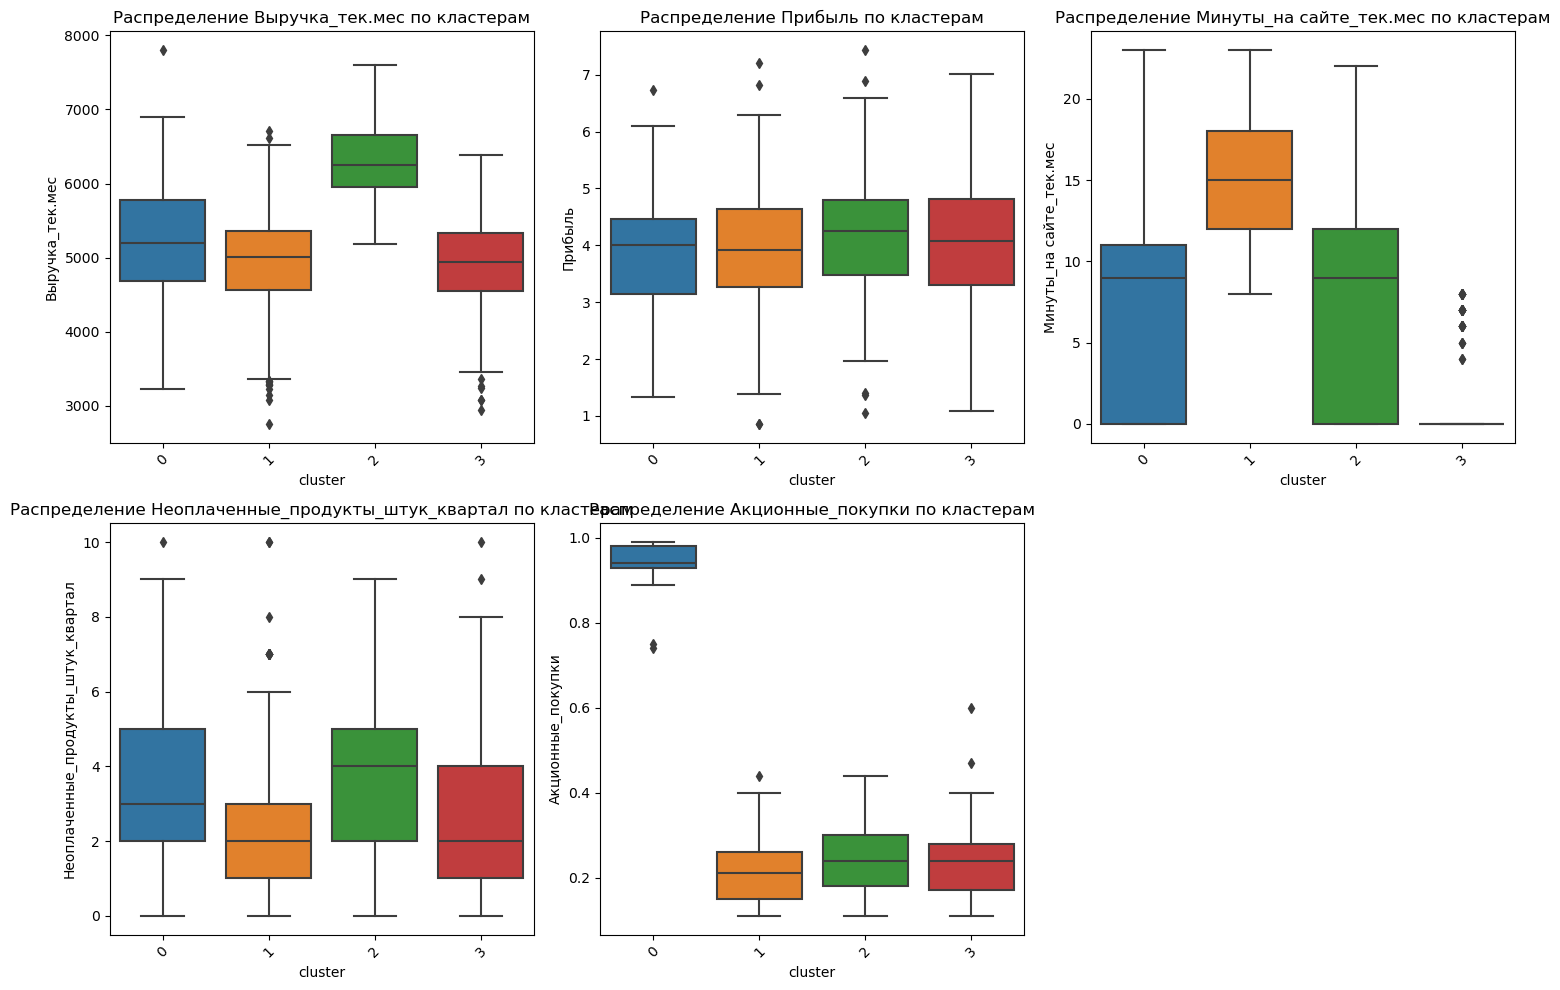

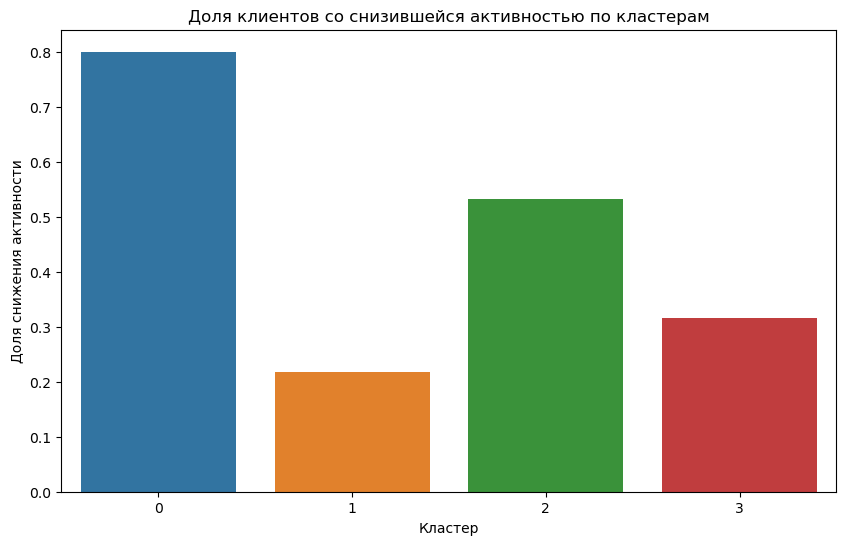

In [44]:
plt.figure(figsize=(15, 10))

features_to_plot = ['Выручка_тек.мес', 'Прибыль', 'Минуты_на сайте_тек.мес', 
                   'Неоплаченные_продукты_штук_квартал', 'Акционные_покупки']

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=feature, data=X_segment)
    plt.title(f'Распределение {feature} по кластерам')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_analysis.index, y=cluster_analysis['Покупательская активность'])
plt.title('Доля клиентов со снизившейся активностью по кластерам')
plt.ylabel('Доля снижения активности')
plt.xlabel('Кластер')
plt.show()

Сравнительная характеристика сегментов покупателей

Рассмотрим ключевые показатели каждого сегмента и проведем их сравнение.

1. Доля снизившейся активности

СЕГМЕНТ 0: 80.1% — самый высокий показатель снижения активности среди всех сегментов.
СЕГМЕНТ 1: 21.9% — минимальный показатель среди остальных сегментов.
СЕГМЕНТ 2: 53.3% — промежуточный уровень активности.
СЕГМЕНТ 3: 31.6% — второй по величине показатель снижения активности.

Анализ: Наиболее критичен сегмент 0, где почти весь клиентский пул перестал проявлять активность. Для восстановления интереса необходима активная работа с клиентами этого сегмента.


2. Прибыльность

СЕГМЕНТ 0: 3.86 — самая низкая прибыльность.
СЕГМЕНТ 1: 3.93 — умеренная прибыльность.
СЕГМЕНТ 2: 4.15 — максимальная прибыльность среди всех сегментов.
СЕГМЕНТ 3: 4.06 — также достаточно высок показатель прибыли.

Анализ: Хотя клиенты сегмента 0 показывают низкую активность, их прибыльность остается удовлетворительной. Однако потенциал роста очевидно имеется в сегментах 1 и 3.


3. Выручка

СЕГМЕНТ 0: 5249 — близкий к среднему уровень выручки.
СЕГМЕНТ 1: 4935 — немного ниже среднего показателя.
СЕГМЕНТ 2: 6301 — самый высокий уровень выручки.
СЕГМЕНТ 3: 4912 — второй снизу показатель.

Анализ: Клиенты сегмента 2 приносят самую большую выручку, что является положительным фактором для фокусировки маркетинга и предложений на этом сегменте.


4. Среднее время на сайте

СЕГМЕНТ 0: 7.6 мин — умеренное время посещения сайта.
СЕГМЕНТ 1: 15.0 мин — самое длительное пребывание на сайте.
СЕГМЕНТ 2: 7.8 мин — чуть выше среднего времени.
СЕГМЕНТ 3: 0.7 мин — минимальное время просмотра страниц.

Анализ: Длительность сессии пользователей в сегменте 1 значительно превышает остальные группы, что говорит о заинтересованности клиентов и возможности конвертации большего числа визитов в покупку.


5. Количество неоплаченных товаров в корзине

СЕГМЕНТ 0: 3.6 товара — сравнительно много брошенных товаров.
СЕГМЕНТ 1: 2.3 товара — лучший показатель среди всех групп.
СЕГМЕНТ 2: 3.8 товара — наибольший показатель неоплаченных позиций.
СЕГМЕНТ 3: 2.5 товара — хороший показатель, близко к сегменту 1.

Анализ: Важно минимизировать проблему брошенной корзины в сегментах 0 и 2, поскольку там фиксируется наибольшее количество незавершённых транзакций.


6. Доля акционных покупок

СЕГМЕНТ 0: 94.3% — абсолютное лидерство по доле покупок по акции.
СЕГМЕНТ 1: 21.4% — минимально зависимы от скидок.
СЕГМЕНТ 2: 25.1% — умеренная зависимость от акций.
СЕГМЕНТ 3: 23.4% — похож на сегмент 2 по данному показателю.

Анализ: Основная масса клиентов сегмента 0 покупает исключительно в рамках специальных предложений, что ограничивает рост выручки вне акций.


7. Отказ от коммуникации

СЕГМЕНТ 0: 28.3% — приемлемый уровень отказов от контактов.
СЕГМЕНТ 1: 27.7% — аналогично первому сегменту.
СЕГМЕНТ 2: 22.0% — наилучший показатель согласия на контакт.
СЕГМЕНТ 3: 25.2% — стабильный уровень откликов.

Анализ: Относительно низкие показатели отказов позволяют проводить успешные рекламные кампании и взаимодействие с клиентами большинства сегментов.


Итоговые рекомендации

Исходя из представленного анализа, рекомендуется следующее распределение ресурсов и действий:

СЕГМЕНТ 0: Необходимо вернуть доверие и повысить лояльность клиентов, восстановить активность путем персонализированных предложений и информирования о новых продуктах.
СЕГМЕНТ 1: Повышение объема заказов за счёт увеличения частоты повторных покупок, возможно, введение бонусных программ лояльности.
СЕГМЕНТ 2: Фокусировка на поддержании высоких показателей прибыли и дальнейшему росту доходов путём расширения ассортимента и предложению сопутствующих товаров.
СЕГМЕНТ 3: Увеличение длительности сессий и повышение доли оплаченных корзин через улучшение юзабилити сайта и упрощение процесса оплаты.

Эти шаги позволят эффективно управлять поведением клиентов и увеличить общий доход компании.